### Tutorial on Data Analysis using Python

### 1. Visualisation and Basic Statistics:

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
# use pd.read.csv function to load the data in the file pokemon.csv as a dataframe
df_pokemon = pd.read_csv("pokemon.csv", na_values='?')

In [44]:
number_rows = len(df_pokemon)
number_columns = len(df_pokemon.columns)
print('There are {} rows and {} columns in the pokemon dataset'.format(number_rows, number_columns))
print(df_pokemon.head(4))

# Display the first four rows of the dataframe "df_pokemon" using the head command to get an idea about the "pokemon" dataset
#print(df_pokemon.head(4)
      
# Get the row count of the dataframe (df_pokemon) 
#print(len(df_pokemon))
#number_rows = len(df_pokemon)

# Get the no of columns of the dataframe (df_pokemon)
#print(len(df_pokemon.columns))
#number_columns = len(df_pokemon.columns)     


There are 800 rows and 13 columns in the pokemon dataset
   #                   Name  Type1   Type2  Total  HP  Attack  Defense  SpAtk  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49     65   
1  2                Ivysaur  Grass  Poison    405  60      62       63     80   
2  3               Venusaur  Grass  Poison    525  80      82       83    100   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123    122   

   SpDef  Speed  Generation     Legendary  
0     65     45           1  NotLegendary  
1     80     60           1  NotLegendary  
2    100     80           1  NotLegendary  
3    120     80           1  NotLegendary  


In [16]:
df_pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type1       800 non-null    object
 3   Type2       414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   SpAtk       800 non-null    int64 
 9   SpDef       800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    object
dtypes: int64(9), object(4)
memory usage: 81.4+ KB


In [47]:
# To Detect the null
#print(pd.isnull(df_pokemon))

print(df_pokemon.isnull())


#pd.isnull(np.nan)
# To exclude all observations affected by missing data
df_pokemon_co = df_pokemon.dropna()
df_pokemon_co_rows = len(df_pokemon_co)

print("There are {} complete observations in the new pokemon dataset".format(df_pokemon_co_rows))
print(df_pokemon_co.Type2)

         #   Name  Type1  Type2  Total     HP  Attack  Defense  SpAtk  SpDef  \
0    False  False  False  False  False  False   False    False  False  False   
1    False  False  False  False  False  False   False    False  False  False   
2    False  False  False  False  False  False   False    False  False  False   
3    False  False  False  False  False  False   False    False  False  False   
4    False  False  False   True  False  False   False    False  False  False   
..     ...    ...    ...    ...    ...    ...     ...      ...    ...    ...   
795  False  False  False  False  False  False   False    False  False  False   
796  False  False  False  False  False  False   False    False  False  False   
797  False  False  False  False  False  False   False    False  False  False   
798  False  False  False  False  False  False   False    False  False  False   
799  False  False  False  False  False  False   False    False  False  False   

     Speed  Generation  Legendary  
0  

### Basic Statistics

In [50]:
MeanHP_legendary = np.mean(df_pokemon_co[df_pokemon_co['Legendary']=='Legendary']['HP'])
MeanHP_Notlegendary = np.mean(df_pokemon_co[df_pokemon_co['Legendary']=='NotLegendary']['HP'])
diff = round(MeanHP_legendary - MeanHP_Notlegendary, 2)
print('The difference in mean HP between legendary and not-legendary pokemon is {}'.format(diff))

The difference in mean HP between legendary and not-legendary pokemon is 28.53


In [53]:
variance = round(np.var(df_pokemon_co[df_pokemon_co['Generation']==1]['Attack']),2)
standarddev = round(np.std(df_pokemon_co[df_pokemon_co['Generation']==1]['Attack']),2)
print('{} and {} are the variance and the standard deviation of Attack for Generation 1 based on df_pokemon_co, respectively.'.format(variance, standarddev))
#print('{:.2f} and {:.2f} are the variance and the standard deviation of Attack for Generation 1 based on df_pokemon_co, respectively.'.format(variance, standarddev))

1024.83 and 32.01 are the variance and the standard deviation of Attack for Generation 1 based on df_pokemon_co, respectively.


In [9]:
stderr = lambda x: np.sqrt(np.var(x)/x.shape[0])
print(stderr(df_pokemon_co[df_pokemon_co['Generation']==1]['Attack']))

# TODO: Add your solution (Python code) in this cell.

3.6247541336448013


Standard error and standard deviation are both measures of variability. The standard deviation is variability within a single sample, while the standard error estimates the variability across multiple samples of a population.

## Visualisation

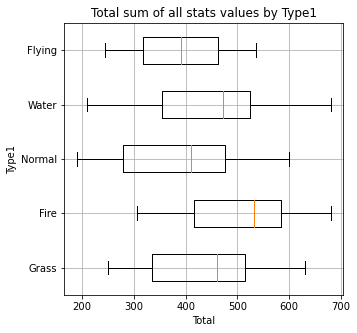

In [56]:
plotlabels = ['Grass', 'Fire', 'Normal', 'Water', 'Flying']
plotdata = [df_pokemon_co[df_pokemon_co['Type1']==label]['Total'] for label in plotlabels]
plt.figure(figsize=(5, 5))
plt.boxplot(plotdata, labels=plotlabels, vert=False, widths=0.5, zorder=3) # Box plot
plt.xlabel('Total')
plt.ylabel('Type1')
plt.title('Total sum of all stats values by Type1')
plt.grid(zorder=0)
plt.show()

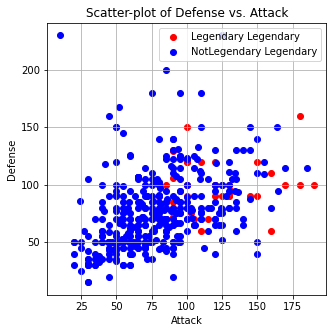

In [41]:
plotlabels = ['Legendary', 'NotLegendary']
plotdata = [df_pokemon_co[df_pokemon_co['Legendary']==label][['Attack','Defense']] for label in plotlabels]
colors = ['red', 'blue']
plt.figure(figsize=(5, 5))
for count, datavalue in enumerate(plotdata):
    plt.scatter(datavalue['Attack'],datavalue['Defense'],color=colors[count],label="{} Legendary".format(plotlabels[count]))
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title('Scatter-plot of Defense vs. Attack')
plt.legend()
plt.grid(zorder=0)
plt.show()